# Interactive landmark selection

In [20]:
# Switch to interactive backend
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from matplotlib.patches import Circle
from matplotlib.widgets import Button

The interactive support of jupyter notebook is poor. If possible, it is recommended to use IDE such as PyCharm and VSCode for interactive selection.

In [21]:
# load spatial data
spatial1 = np.array(pd.read_csv('data_demo/spatial1.csv', header=None))  # ndarray:(46026,2)
spatial2 = np.array(pd.read_csv('data_demo/spatial2.csv', header=None))
landmark1 = np.array(pd.read_csv('data_demo/landmark1.csv', header=None))  # ndarray:(50,2)
landmark2 = np.array(pd.read_csv('data_demo/landmark2.csv', header=None))

## Define callback function

In [22]:
highlights = []
highlight_history = []  

In [ ]:
def on_pick(event, lm1, lm2, spatial1, spatial2):
    global highlights, highlight_history
    
    if event.artist in (scatter2, scatter4):
        xdata, ydata = event.artist.get_offsets().T
        indices = event.ind
        print("Selected index:", indices)

        ax1 = fig.axes[0]
        for index in indices:
            circle = Circle((lm1[index, 0], lm1[index, 1]), 120, color='black', fill=False, lw=3)
            ax1.add_patch(circle)
            highlights.append(circle)
            highlight_history.append(circle)  

        ax2 = fig.axes[1]
        for index in indices:
            circle = Circle((lm2[index, 0], lm2[index, 1]), 120, color='black', fill=False, lw=3)
            ax2.add_patch(circle)
            highlights.append(circle)
            highlight_history.append(circle)

        fig.canvas.draw_idle()

        if event.artist == scatter2:
            for index in indices:
                error = 1e-6
                matches = (np.abs(lm1[:, 0] - xdata[index]) < error) & (np.abs(lm1[:, 1] - ydata[index]) < error)
                target_indices = np.where(matches)[0]
                print(f"find lm1 ({xdata[index]}, {ydata[index]}) whose index is: {target_indices}")
                print(f"corresponding to lm2 ({lm2[index, 0]}, {lm2[index, 1]})")
        elif event.artist == scatter4:
            for index in indices:
                error = 1e-6
                matches = (np.abs(lm2[:, 0] - xdata[index]) < error) & (np.abs(lm2[:, 1] - ydata[index]) < error)
                target_indices = np.where(matches)[0]
                print(f"find lm2 ({xdata[index]}, {ydata[index]}) whose index is: {target_indices}")
                print(f"corresponding to lm1 ({lm1[index, 0]}, {lm1[index, 1]})")


## Create the canvas

Text(0.5, 1.0, 'slice2')

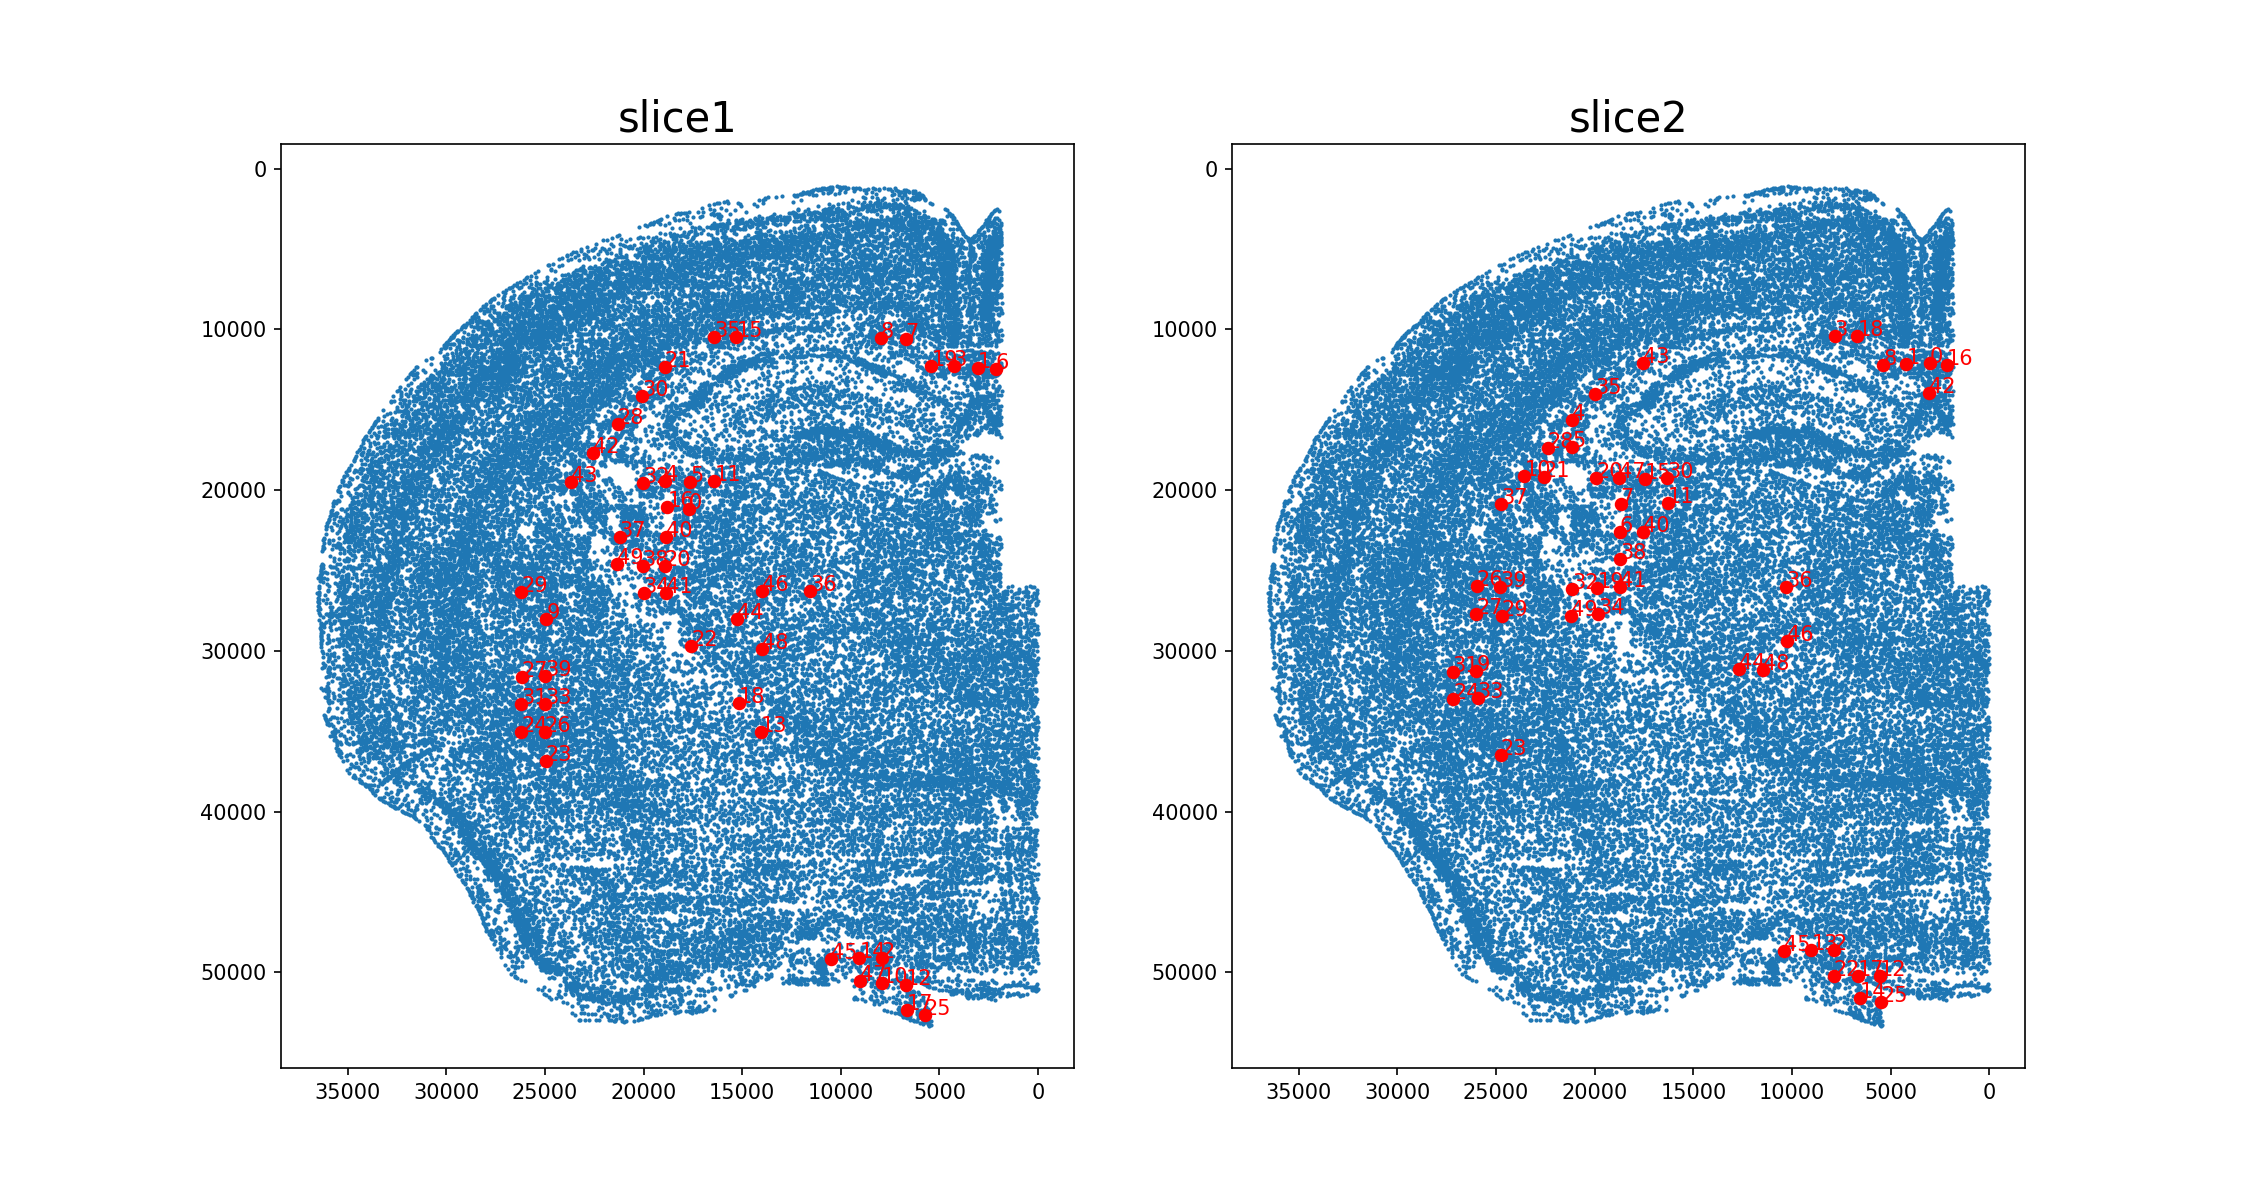

Selected index: [13]
find lm1 (14052.762711864409, 35017.57627118644) whose index is: [13]
corresponding to lm2(9007.796296296296, 48620.5)
Selected index: [27]
find lm1 (26173.27118644068, 31595.406779661014) whose index is: [27]
corresponding to lm2(25993.4625, 27711.1625)


In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=150, figsize=(15, 8))

# left figure
scatter1 = ax1.scatter(spatial1[:, 0], spatial1[:, 1], s=1)
scatter2 = ax1.scatter(landmark1[:, 0], landmark1[:, 1], s=30, c="red", picker=True, pickradius=5)  # set tolerance to pick all landmarks
ax1.invert_yaxis()
ax1.invert_xaxis()
for i in range(landmark1.shape[0]):
    ax1.text(landmark1[i, 0], landmark1[i, 1], f'{i}', c='red')
ax1.set_title('slice1', fontsize=20)

# right figure
scatter3 = ax2.scatter(spatial2[:, 0], spatial2[:, 1], s=1)
scatter4 = ax2.scatter(landmark2[:, 0], landmark2[:, 1], s=30, c="red", picker=True, pickradius=5)
ax2.invert_yaxis()
ax2.invert_xaxis()
for i in range(landmark2.shape[0]):
    ax2.text(landmark2[i, 0], landmark2[i, 1], f'{i}', c='red')
ax2.set_title('slice2', fontsize=20)


In [25]:
# connect pick event to callback function(on_pick)
on_pick_with_lm = partial(on_pick, lm1=landmark1, lm2=landmark2, spatial1=spatial1, spatial2=spatial2)
pick_id = fig.canvas.mpl_connect('pick_event', on_pick_with_lm)

## Define functional functions and buttons

In [26]:
def clear_highlights(event):
    global highlights
    for highlight in highlights:
        highlight.remove()
    highlights.clear()
    fig.canvas.draw_idle()
    print("------------clear all the highlights------------")


def undo_highlight(event):
    global highlights, highlight_history
    if highlight_history:
        last_highlight1 = highlight_history.pop()
        last_highlight1.remove()
        last_highlight2 = highlight_history.pop()
        last_highlight2.remove()
        highlights.remove(last_highlight1)
        highlights.remove(last_highlight2)  # undo last two (a pair of) highlighted landmarks
        fig.canvas.draw_idle()
        print("------------revoke last two highlights------------")
    else:
        print("------------no revocable highlights left------------")


def save_figure(event):
    plt.savefig('highlighted_figure.png')
    print("------------The current image has been saved------------")
    print(highlights)


In [27]:
# add the functional buttons
clear_button_ax = plt.axes([0.9, 0.15, 0.1, 0.05]) 
clear_button = Button(clear_button_ax, 'Clear Highlights', hovercolor='0.9')
clear_button.label.set_fontsize(7)
clear_button.on_clicked(clear_highlights)

undo_button_ax = plt.axes([0.9, 0.2, 0.1, 0.05])
undo_button = Button(undo_button_ax, 'Revoke Highlights', hovercolor='0.9')
undo_button.label.set_fontsize(7)
undo_button.on_clicked(undo_highlight)

save_button_ax = plt.axes([0.9, 0.25, 0.1, 0.05])
save_button = Button(save_button_ax, 'Save Figure', hovercolor='0.9')
save_button.label.set_fontsize(8)
save_button.on_clicked(save_figure)

0

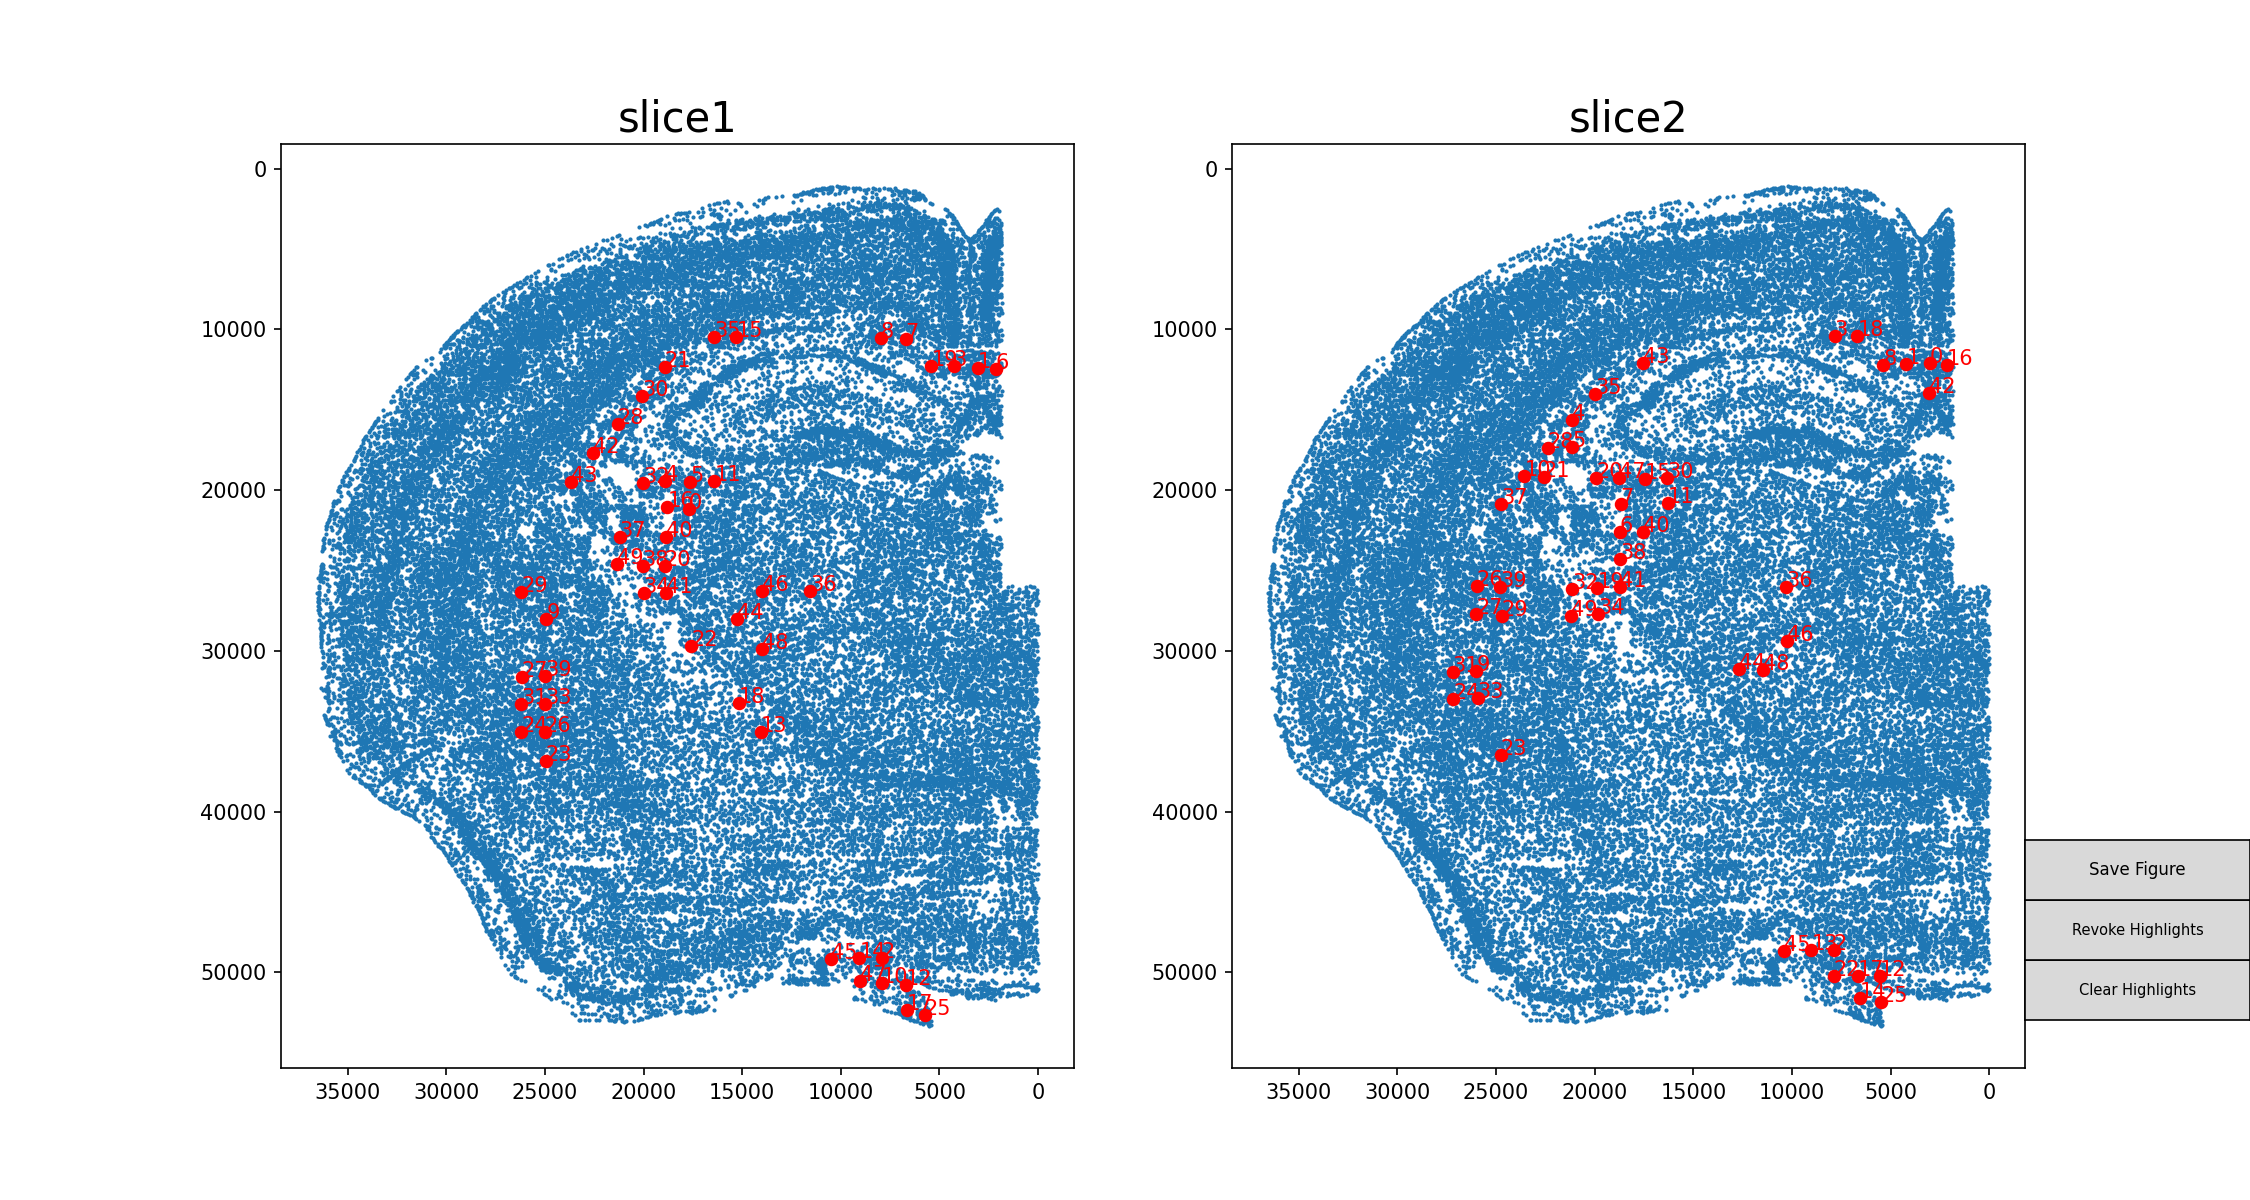

In [28]:
# show interavtive figure
plt.show()
